In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme()
sns.set_context("notebook")
%load_ext autoreload
%autoreload 2

In [2]:
dtype_dict = {
    'Date': 'str',
    'FarmName_Pseudo': 'str',
    'SE_Number': 'str',
    'Age': 'Int64',
    'BreedName': 'str',
    'DailyYield': 'float',
    'PreviousDailyYield': 'float',
    'DailyYieldChange': 'float',
    'DaysInMilk': 'float',
    'YearSeason': 'str',
    'LactationNumber': 'float',
    'ExpectedYield': 'float',
    'NormalizedDailyYield': 'float',
    'NormalizedDailyYieldChange': 'float',
    'HeatStress': 'Int64',
    'Temp15Threshold': 'Int64',
    'HW': 'Int64',
    'cum_HW': 'Int64',
    'MeanTemperature': 'float',
    'MeanTHI_adj': 'float',
    'FarmHeatStressMilkProduction': 'float'
}

milk_data = pd.read_csv('../Data/MergedData/BLRMilkFarmYieldData.csv', dtype=dtype_dict)
milk_data['Date'] = pd.to_datetime(milk_data['Date'], format='%Y-%m-%d')
milk_data.head(-5)

,Date,FarmName_Pseudo,SE_Number,Age,BreedName,LactationNumber,DaysInMilk,YearSeason,DailyYield,PreviousDailyYield,...,ExpectedYield,NormalizedDailyYield,NormalizedDailyYieldChange,HeatStress,Temp15Threshold,HW,cum_HW,MeanTemperature,MeanTHI_adj,FarmHeatStressMilkProduction
0,2022-01-01,a624fb9a,SE-064c0cec-1189,3095,02 SLB,7.0,191.0,2022-1,30.77,0.000000,...,35.914865,0.856748,0.000000,0,0,0,0,-3.025000,28.012944,0.009435
1,2022-01-02,a624fb9a,SE-064c0cec-1189,3096,02 SLB,7.0,192.0,2022-1,48.22,30.770000,...,35.799613,1.103224,0.243718,0,0,0,0,-0.279167,32.898193,0.009435
2,2022-01-03,a624fb9a,SE-064c0cec-1189,3097,02 SLB,7.0,193.0,2022-1,30.53,39.495000,...,35.684360,1.023044,-0.083744,0,0,0,0,2.033333,36.760487,0.009435
3,2022-01-04,a624fb9a,SE-064c0cec-1189,3098,02 SLB,7.0,194.0,2022-1,42.26,36.506667,...,35.569108,1.066796,0.040438,0,0,0,0,0.066667,31.939524,0.009435
4,2022-01-05,a624fb9a,SE-064c0cec-1189,3099,02 SLB,7.0,195.0,2022-1,38.49,37.945000,...,35.453856,1.073339,0.003074,0,0,0,0,-3.700000,26.498206,0.009435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483097,2023-06-03,f454e660,SE-fcdf259d-0044-0,4150,41 Fjällko,10.0,347.0,2023-3,12.67,14.652000,...,13.608593,1.030966,-0.045706,0,1,0,0,12.666667,53.132530,0.001001
483098,2023-06-04,f454e660,SE-fcdf259d-0044-0,4151,41 Fjällko,10.0,348.0,2023-3,22.31,14.030000,...,13.516773,1.108549,0.070579,0,1,0,0,13.079167,56.726870,0.001001
483099,2023-06-05,f454e660,SE-fcdf259d-0044-0,4152,41 Fjällko,10.0,349.0,2023-3,12.84,14.984000,...,13.424952,1.109278,-0.006853,0,1,0,0,14.237500,58.482418,0.001001
483100,2023-06-06,f454e660,SE-fcdf259d-0044-0,4153,41 Fjällko,10.0,350.0,2023-3,9.47,14.892000,...,13.333131,1.095617,-0.021300,0,1,0,0,15.345833,60.546358,0.001001


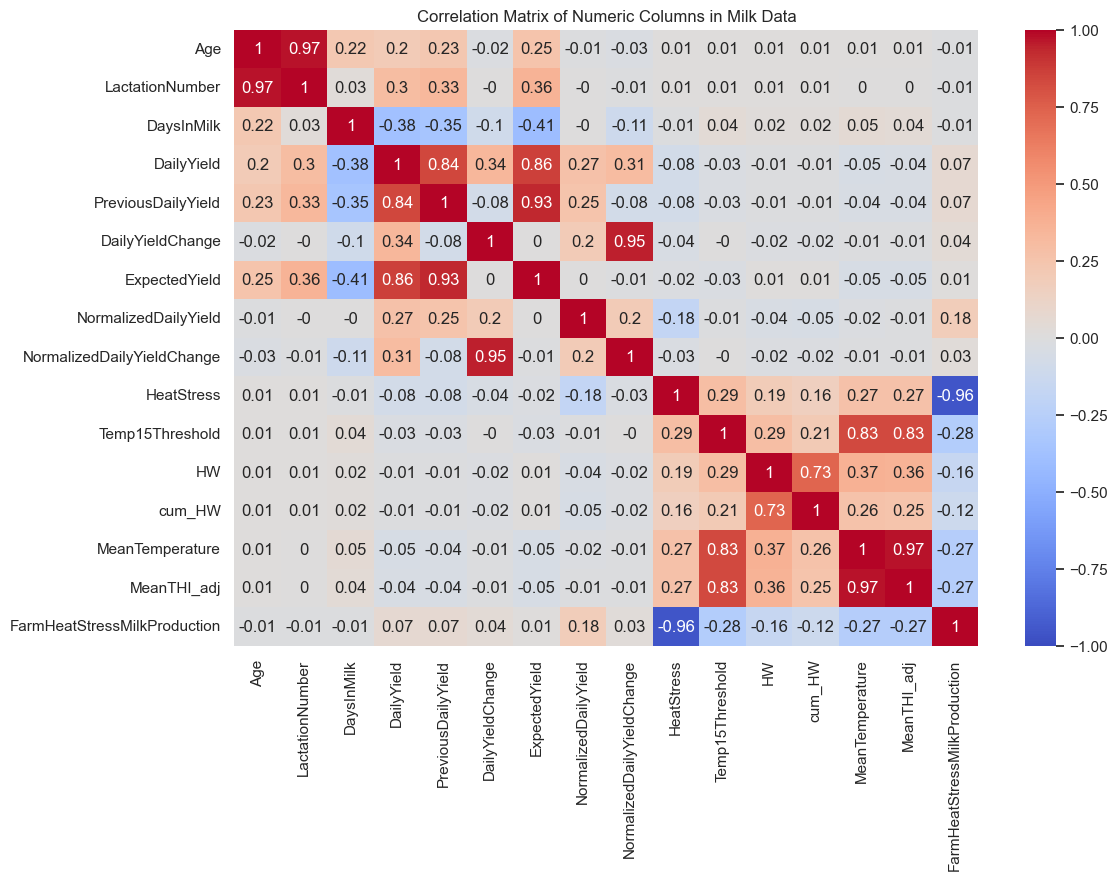

In [3]:
# Filter out only numeric columns
numeric_cols = milk_data.select_dtypes(include=['float64', 'int64']).columns
milk_data_numeric = milk_data[numeric_cols]

# Calculate the correlation matrix
corr_matrix = milk_data_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Columns in Milk Data')
plt.show()

In [4]:
def plot_correlation_deviation_for_farm(farm_name, milk_data):
    # Filter the data for the specified farm
    farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm_name]
    
    # Calculate the correlation for each cow within the farm
    grouped = farm_data.groupby('SE_Number')
    correlations = pd.DataFrame({
        'SE_Number': list(grouped.groups.keys()),
        'Correlation': [grouped.get_group(name)[['NormalizedDailyYield', 'HeatStress']].corr().iloc[0, 1] for name in grouped.groups.keys()]
    })
    
    # Calculate the baseline (mean correlation)
    baseline_correlation = correlations['Correlation'].mean()
    
    # Calculate deviations from the baseline
    correlations['Deviation from Baseline'] = correlations['Correlation'] - baseline_correlation
    
    # Plotting
    plt.figure(figsize=(17, 6))
    barplot = sns.barplot(x='SE_Number', y='Deviation from Baseline', data=correlations, hue='SE_Number', palette='Spectral', dodge=False, legend=False)

    # Add baseline line
    plt.axhline(0, color='red', linestyle='--', linewidth=2, label=f'Baseline (Mean Correlation = {baseline_correlation:.4f})')

    # Formatting the plot
    plt.xlabel('Individual Cow', fontsize=14)
    plt.ylabel('Deviation from Mean Correlation', fontsize=14)
    plt.title(f'Correlation Deviation from Baseline for Each Cow at {farm_name}', fontsize=16)

    # Remove x-axis ticks
    plt.xticks([])
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


In [5]:
def plot_correlation_deviation_for_farm_with_zero_baseline(farm_name, milk_data):
    # Filter the data for the specified farm
    farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm_name]
    
    # Calculate the correlation for each cow within the farm
    grouped = farm_data.groupby('SE_Number')
    correlations = pd.DataFrame({
        'SE_Number': list(grouped.groups.keys()),
        'Correlation': [grouped.get_group(name)[['NormalizedDailyYield', 'HeatStress']].corr().iloc[0, 1] for name in grouped.groups.keys()]
    })
    
    # Calculate deviations from the baseline (which is now 0)
    correlations['Deviation from Baseline'] = correlations['Correlation']
    
    # Plotting
    plt.figure(figsize=(17, 6))
    barplot = sns.barplot(x='SE_Number', y='Deviation from Baseline', data=correlations, hue='SE_Number', palette='Spectral', dodge=False, legend=False)

    # Add baseline line
    plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Baseline (Correlation = 0)')

    # Formatting the plot
    plt.xlabel('Individual Cow', fontsize=14)
    plt.ylabel('Deviation from Zero Baseline', fontsize=14)
    plt.title(f'Correlation Deviation from Zero Baseline for Each Cow at {farm_name}', fontsize=16)

    # Remove x-axis ticks
    plt.xticks([])
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

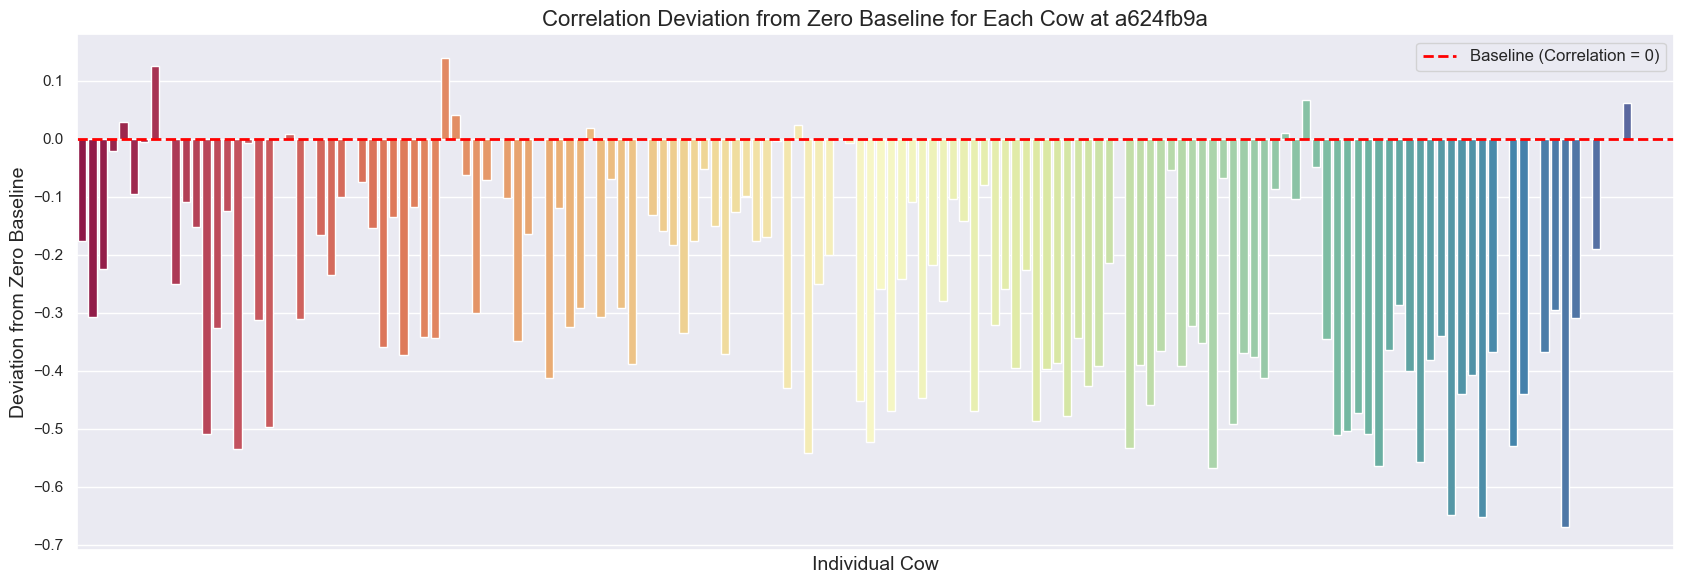

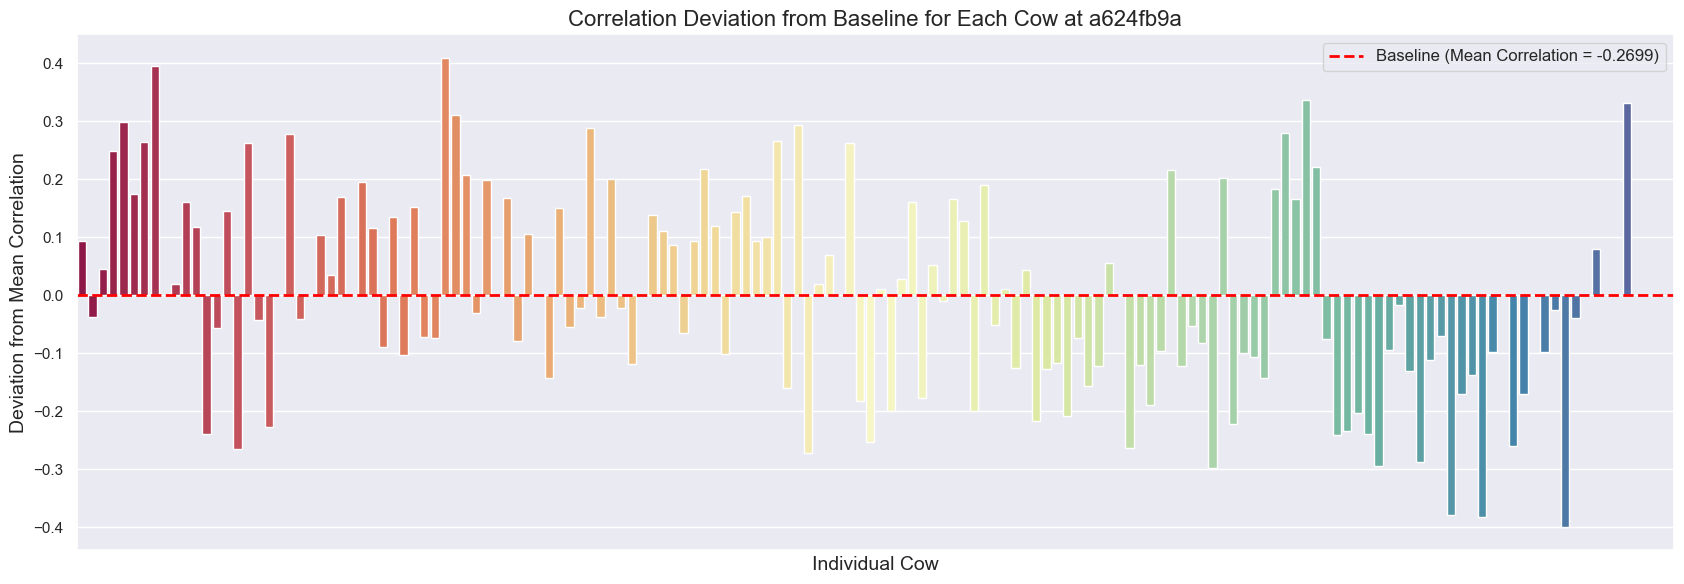

In [6]:
farm_name = 'a624fb9a'

plot_correlation_deviation_for_farm_with_zero_baseline(farm_name, milk_data)

plot_correlation_deviation_for_farm(farm_name, milk_data)

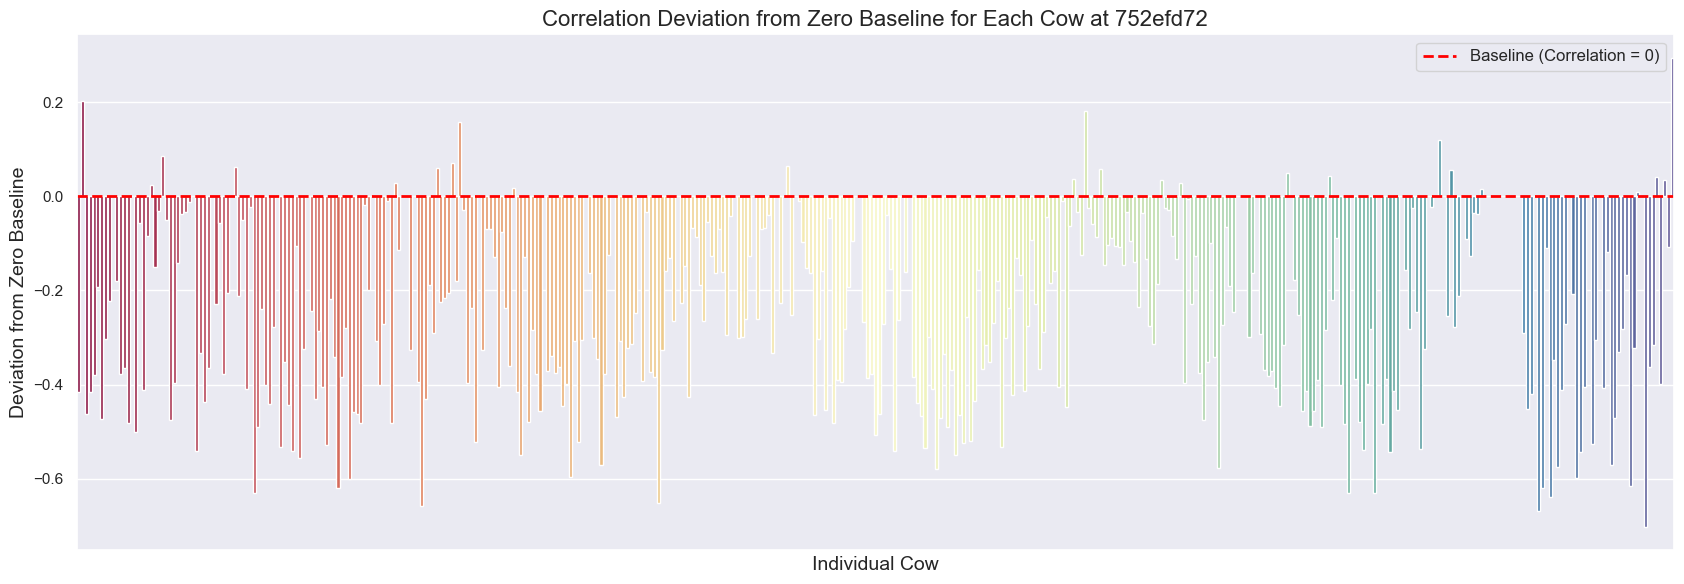

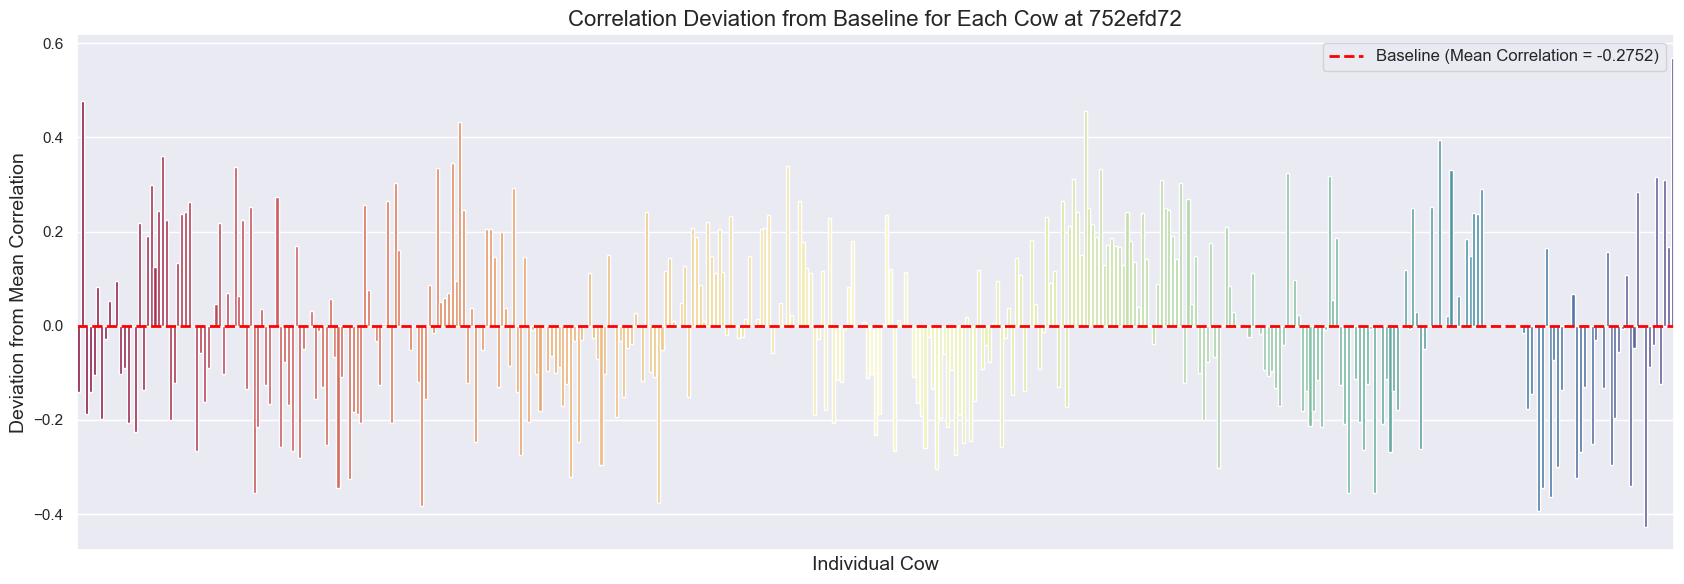

In [7]:
farm_name = '752efd72'

plot_correlation_deviation_for_farm_with_zero_baseline(farm_name, milk_data)

plot_correlation_deviation_for_farm(farm_name, milk_data)

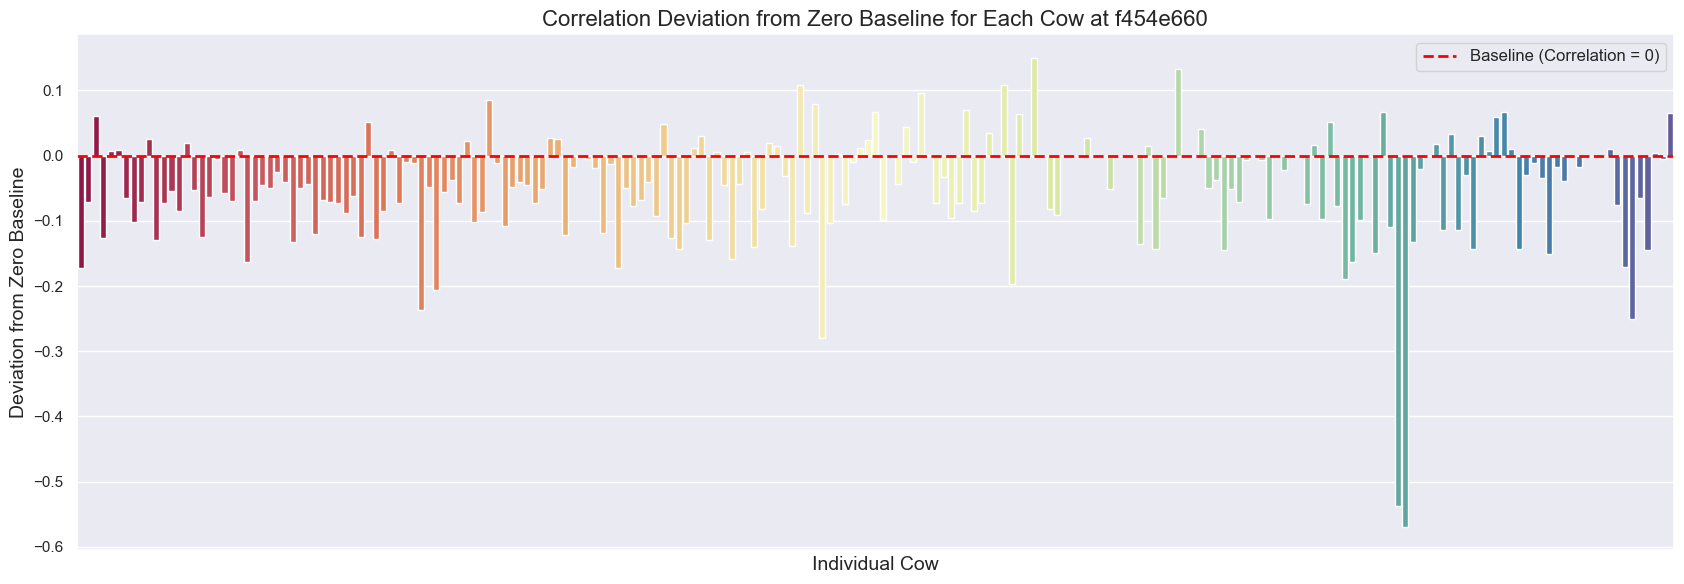

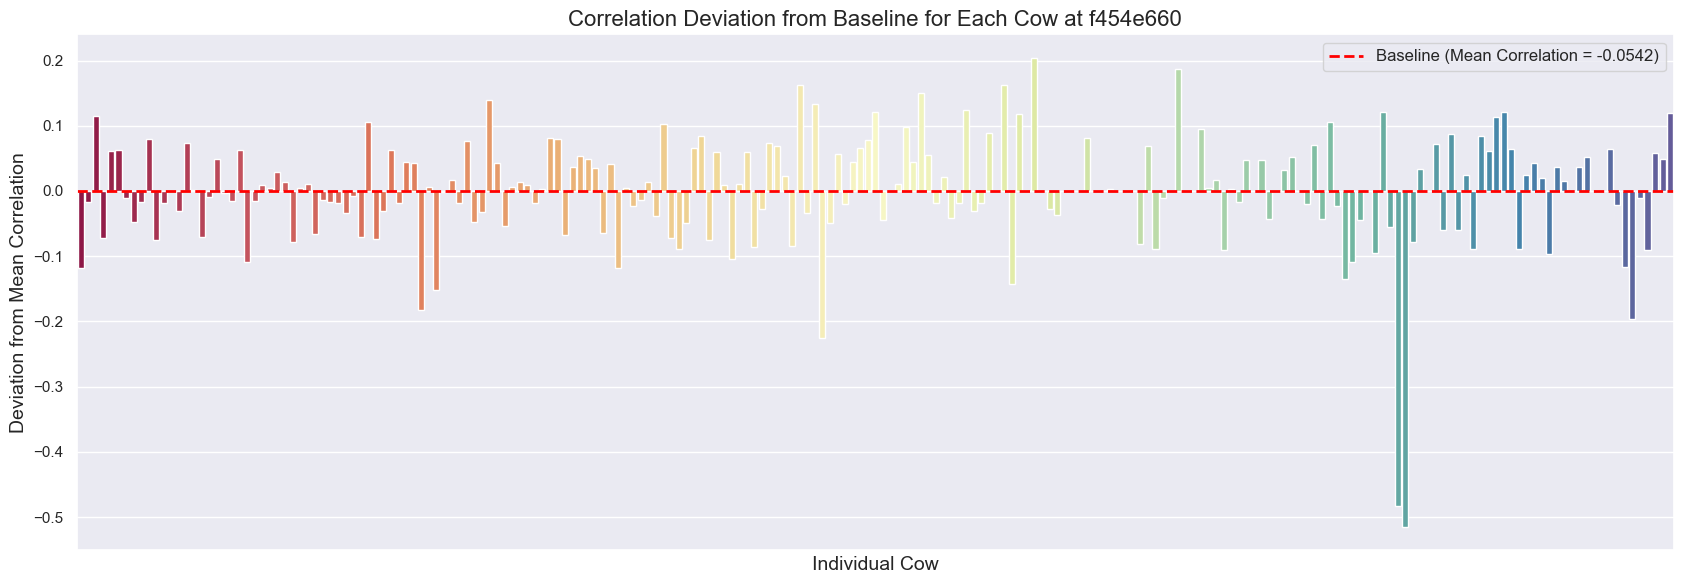

In [8]:
farm_name = 'f454e660'

plot_correlation_deviation_for_farm_with_zero_baseline(farm_name, milk_data)

plot_correlation_deviation_for_farm(farm_name, milk_data)

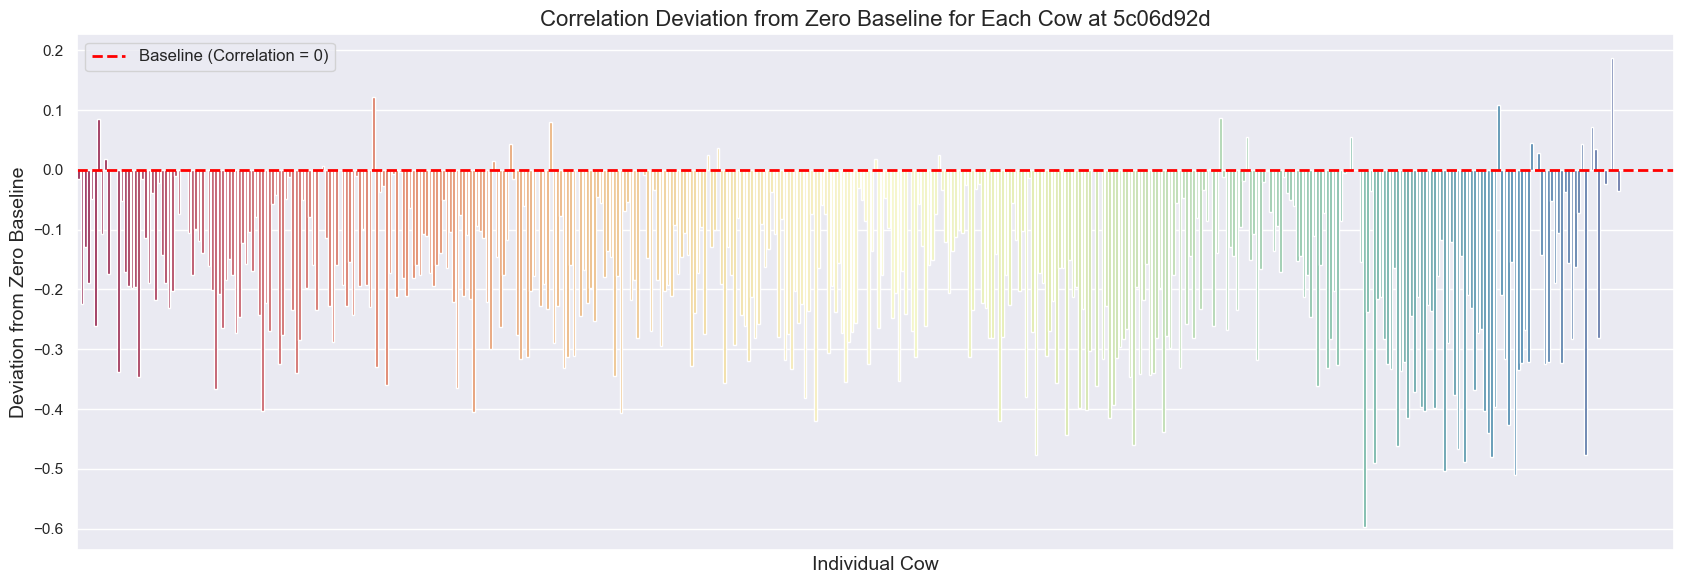

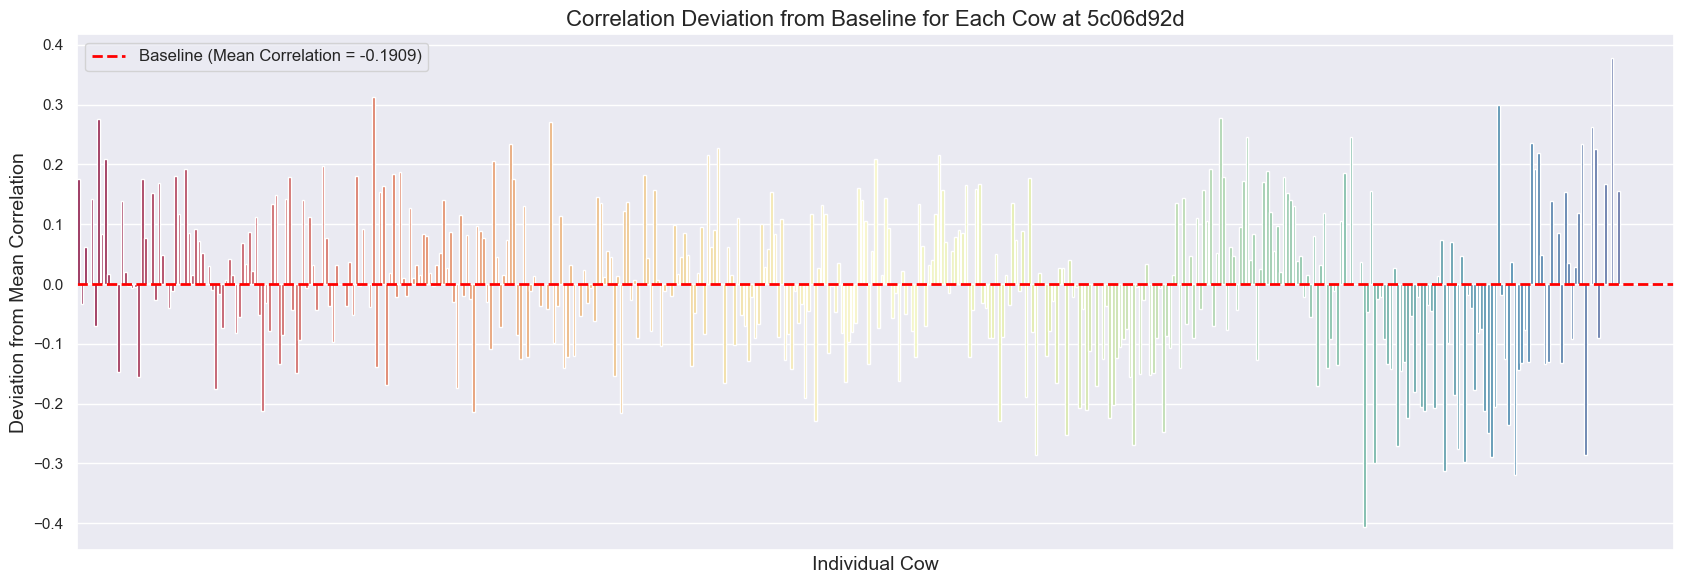

In [9]:
farm_name = '5c06d92d'

plot_correlation_deviation_for_farm_with_zero_baseline(farm_name, milk_data)

plot_correlation_deviation_for_farm(farm_name, milk_data)